In this tutorial, I would like to introduce the way of using the APIs provided by Twitter to collect Donald Trump's tweets and visualizing the result as a word cloud. The complete program includes four main parts and this tutorial will make introduction of each part. Here is the basic information of what each part does:

Part I will introduce the libraries used in our task and the installation of some libraries, which needs some extra work.

Part II will discuss the twitter APIs and the use of tweepy, a library allowing developers to conveniently collect data from Twitter.

Part III is the most complicated one. In this part, a library called nltk which is usually used to do NLP(natural language processing) research will be used to analyze the twitter content. Also, the analysis of twitter text will refer to a little knowledge of regular expression, which is included in re module.

Part IV is the process of visualizing data. In this part we will use a library called wordcloud to generate the information of word cloud and a very popular library, matplotlib, to present all we've got on screen visually.

First Here is the complete code and its output:

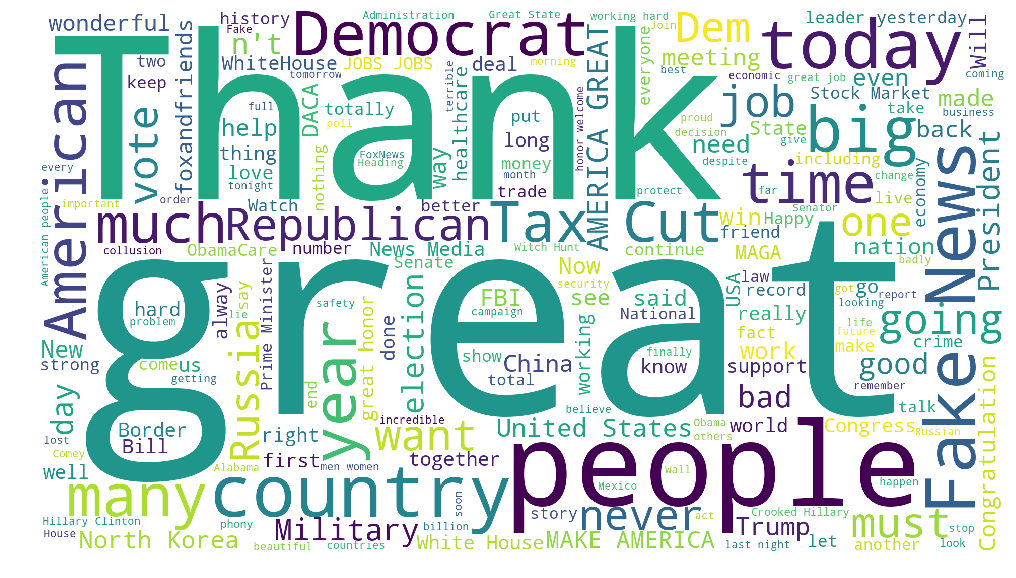

In [35]:
# Programmed by Xiaoyang Wang
# Part I
import tweepy
import nltk
import re
from nltk.corpus import stopwords  
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Part II
consumer_key = 'vyMQss4mfn0Ba2w0ucNFxULed'
consumer_key_secret = 'wjlgbkpVoJrRegMA8laIMevjrl3xGJEi7tlnG9G33i5LRWojV4'
access_token = '984205721255534593-Qtqlgft6DHI5c8RwGUhvTdH2RkQz3Or'
access_token_secret = 'nfs14cRBciU9mO2WgQZAC7oelwVmwYmD7LSge8rDZuXwI'

myAuth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
myAuth.set_access_token(access_token, access_token_secret)

researchProject = tweepy.API(myAuth)

def createString(account):
    content = ''
    for tweet in tweepy.Cursor(researchProject.user_timeline,screen_name=account,tweet_mode='extended' ).items():
        if (not tweet.retweeted) and ('RT @' not in tweet.full_text):
            content=content+tweet.full_text+'\n'
    return content

targetedAccount = '@realDonaldTrump'
myContent = createString(targetedAccount)

# Part III
def editString(text):
    text = text.replace('&amp','')
    text = text.replace('#','')
    text = re.sub(r'https://t.co/.{10}','',text)
    textList = nltk.word_tokenize(text)
    englishPunctuations = [',', '.', ':', ';', '?', '(', ')', '[', ']', '&', '!', '*', '@', '#', '$', '%']
    textList = [word for word in textList if word not in englishPunctuations]
    textList = [word for word in textList if word not in stopwords.words('english')]
    textList = " ".join(textList)
    return textList
    
finalContent = editString(myContent)

# Part IV
wordcloudResult = WordCloud(background_color='white',width=1920, height=1080, margin=2).generate(finalContent)

plt.figure(figsize=(20,10))
plt.imshow(wordcloudResult)
plt.axis("off")
plt.show()

wordcloud.to_file('TrumpWordCloud.png')

"
1.  import tweepy
2.  import nltk
3.  import re
4.  from nltk.corpus import stopwords  
5.  import matplotlib.pyplot as plt
6.  from wordcloud import WordCloud
"

At the beginning of the program, we need to use "import [library name]" command to use the libraries we need. If we just need specific part of a huge library, we can use "from [library name] import [module we need]" to indicate the needed module instead of importing the whole library. Another command I use here is "import...as...", which is usually to simplify the complicated name of the library.

Here I use six import commands to include the libraries I need. If we are programming under Anaconda 3, some of the libraries like re and matplotlib have already been perfectly installed. What we need to do is just using import command to call them. Other libraries which are not available at the beginning can be installed by opening command-line interface and inputing "conda install -c conda-forge [library name]".

There are two librarie that need extra work before working normally.:

The first one is wordcloud library. Since wordcloud works based on python image library(PIL), PIL must be installed before using wordcloud. Note that PIL only supports python 2. In python 3 environment, we can install a fork library called pillow instead of PIL. 

The second one is nltk library. Although nltk has been installed in advance, for our project it is not complete. To solve the problem, before writting the code we can execute the command "nltk.download()" directly in Jupyter and download the nltk modules we need. After downloading the complete nltk packages, we can use import command to import nltk library. "nltk.download()" command is not needed anymore once we finish installing the needed module.

"
1.  consumer_key = 'vyMQss4mfn0Ba2w0ucNFxULed'
2.  consumer_key_secret = 'wjlgbkpVoJrRegMA8laIMevjrl3xGJEi7tlnG9G33i5LRWojV4'
3.  access_token = '984205721255534593-Qtqlgft6DHI5c8RwGUhvTdH2RkQz3Or'
4.  access_token_secret = 'nfs14cRBciU9mO2WgQZAC7oelwVmwYmD7LSge8rDZuXwI'
5.
6.  myAuth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
7.  myAuth.set_access_token(access_token, access_token_secret)
8.
9.  researchProject = tweepy.API(myAuth)
10.
11. def createString(account):
12.    content = ''
13.    for tweet in tweepy.Cursor(researchProject.user_timeline,screen_name=account,tweet_mode='extended' ).items():
14.        if (not tweet.retweeted) and ('RT @' not in tweet.full_text):
15.            content=content+tweet.full_text+'\n'
16.    return content
17.
18. targetedAccount = '@realDonaldTrump'
19. myContent = createString(targetedAccount)
"

This section will explain how to apply for the developer account of twitter and use the twitter APIs to download tweets.

First we need a twitter account. Then we can visit https://apps.twitter.com/ to create a new app for our research. After finishing all the application, we should have four keys: consumer_key, consumer_key_secret, access_token and access_token_secret(line 1 to line 4) 

Line 6 to 9 shows how to use the keys we get above to pass OAuth2, a verification system we need to pass to get the authorization of using twitter's APIs. 

Between line 11 and 16 I define a function that collects all the original tweets from Donald Trump. The function receives a parameter which indicates the name of our targeted account and returns the tweets in the form of a string. At the beginning of the function I create a blank string called content to store things collected from twitter. Then I use Cursor, a method provided by tweepy library allowing developers to coveniently walk through the large chunk of information which is divided into pages in twitter. the code ".items()" behind Cursor indicates how many tweets we want to collect each page. For example, ".items(100)" means we collect 100 tweets each page. Here I leave no number in the parentheses, meaning I want to collect every tweet on one page. Cursor is only a method allowing us to traverse information but it doesn't indicate what we really want to collect. Therefore, in the parentheses behind Cursor we need to use twitter's API to tell Cursor what we want it to traverse. The API called user_timeline allows us to collect tweets of one account. It receives several parameters. Here I only use two of them, one indicating the name of our targeted account and the other telling the program to return full text of the tweets. Note that user_timeline is not the method provided by tweepy library itself and tweepy only allows us to get the authorization of using this command, so we shouldn't write it as tweepy.user_timeline.

After collecting all tweets(in fact the number is up to 3600 because of twitter's restriction) of the targeted user, we can set conditions(line 14) to filter the retweets and leave only original tweets. Then we need to write the tweets we collect into the blank string we create at the beginning for further analysis.

In line 18 and 19 we create a variable called "@realDonaldTrump" and pass it to the function. By doing this, we can collect the first 3600 tweets of Trump and filter all retweets.


"
1.  def editString(text):
2.      text = text.replace('&amp','')
3.      text = text.replace('#','')
4.      text = re.sub(r'https://t.co/.{10}','',text)
5.      textList = nltk.word_tokenize(text)
6.      englishPunctuations = [',', '.', ':', ';', '?', '(', ')', '[', ']', '&', '!', '*', '@', '#', '$', '%']
7.      textList = [word for word in textList if word not in englishPunctuations]
8.      textList = [word for word in textList if word not in stopwords.words('english')]
9.      textList = " ".join(textList)
10.     return textList
11.   
12.     finalContent = editString(myContent)
"

This section will explain how we deal with the tweets collected above. 

We need to know it is not everything in the tweets is valuable in our analysis. For example, punctuations, conjunctions and prepositions may appear many times in the text, but they don't show any useful information. So we need to create a stop list to exclude these meaningless words. 

A function called editString is created here to receive the twitter content we collect above and return the new content after finishing the filtering work. By observing the collected content, I find that there are many useless strings like "&amp"(something related to HTML), "#" and "https://t.co/..." in the whole text that will influence our final result. My method is to replace those strings with a null character. For the first two strings, since they are fixed, we can directly use a method implanted in python called "replace" to replace these two strings by null character.The strings like "https://t.co/..." are more complicated to deal with because they represent URLs and finish in different values pointing to different websites. However, those strings all start with the same sub-string "https://t.co/" and end in a sub-string consisting of ten characters. So we can import the regular expression module to solve the problem. Line 4 shows how a string starts with "https://t.co/" and ends in ten random characters is expressed in regular expression: '.' represents any character and '{10}' means the match will stop after finding ten characters. Then we can use a function called sub in re module to replace the "https" strings with null character.

Then we'll begin to use nltk. In line 5, we use a method called word_tokenize to change the chunk of text into a long list consisting of single words. Line 6,7 and 8 show the work of creating a punctuation list and introducing a stop words list implanted in nltk library to delete words contained in the two lists from the tweet text. In line 9, we use a method implanted in python called "join" to restore the list back to a string. In the end the function returns a brand-new text string that contains far less trash information.

In line 12 we pass the original text we collect from Trump's twitter, myContent, to the function and wait for a new string to generate the word cloud.

"
1.  wordcloudResult = WordCloud(background_color='white',width=1920, height=1080, margin=2).generate(finalContent)
2.
3.  plt.figure(figsize=(20,10))
4.  plt.imshow(wordcloudResult)
5.  plt.axis("off")
6.  plt.show()
7.
8.  wordcloud.to_file('TrumpWordCloud.png')
"

Finally we get to the visualization stage. This part is very easy. All we need to do is to set the parameter of our word cloud to determine how it looks like. First we need to generate the content of the word cloud. WordCloud library allows us to decide the size, background color and many other things of our image. Here I set the background color as white and the size of the word cloud as 1920x1080. Of course, remember to pass the string we get above as data source.

Then we use matplotlib library to visualize our word cloud. Here I simply set the size of image shown on screen and decide not to include axis in the final result. At the end, we can use the command "wordcloud.to_file" to save the word cloud into our computer. The specific path can be checked in command-line interface.